In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [97]:
train.shape, test.shape

((12980, 12), (4399, 11))

In [98]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [99]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [100]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [101]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

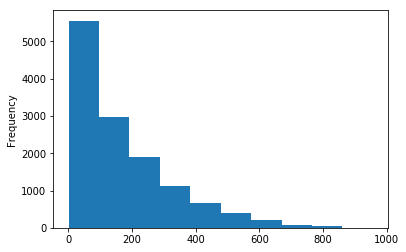

In [102]:
train['count'].plot.hist()

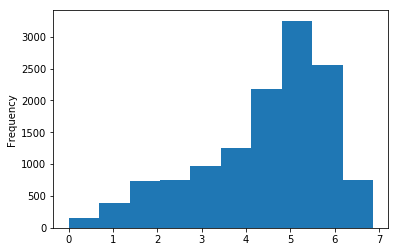

In [103]:
np.log(train['count']).plot.hist()

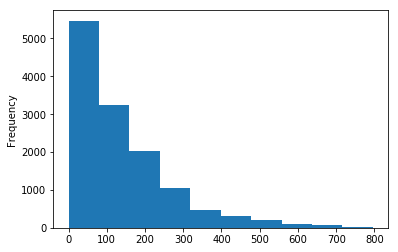

In [104]:
train['registered'].plot.hist()

In [105]:
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()

,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.991839,0.459414,0.344451,-0.048478,-0.008669,0.415938
atemp,0.991839,1.000000,0.454015,0.342345,-0.031606,-0.049997,0.412644
casual,0.459414,0.454015,1.000000,0.509175,-0.320253,0.079524,0.707938
registered,0.344451,0.342345,0.509175,1.000000,-0.279501,0.100579,0.968329
humidity,-0.048478,-0.031606,-0.320253,-0.279501,1.000000,-0.296975,-0.322269
windspeed,-0.008669,-0.049997,0.079524,0.100579,-0.296975,1.000000,0.105607
count,0.415938,0.412644,0.707938,0.968329,-0.322269,0.105607,1.000000


In [106]:
import seaborn as sn

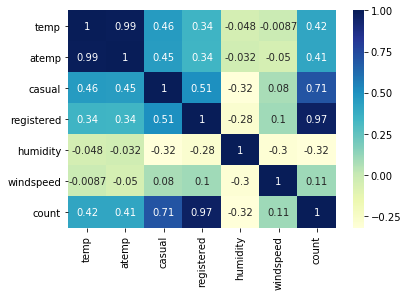

In [107]:
sn.heatmap(corr,annot=True, cmap="YlGnBu")

In [108]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [109]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [110]:
from datetime import datetime
from datetime import date
import calendar

In [111]:
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [112]:
training=train[train['datetime']>='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

In [113]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

In [114]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [115]:
x_train=training.drop('count',axis=1)
y_train=np.log(training['count'])
x_val=validation.drop('count',axis=1)
y_val=np.log(validation['count'])

In [116]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
pred=lreg.predict(x_val)

In [118]:
pred


array([3.15374823, 3.0960667 , 3.14487241, ..., 5.14054747, 4.66719025,
       3.47352343])

In [136]:
def rmsle(y,y_):
    y=np.exp(y)
    y_=np.exp(y_)
    logp=np.nan_to_num(np.array([np.log(p+1)for p in y]))
    loga=np.nan_to_num(np.array([np.log(a+1)for a in y_]))
    calc=(logp-loga)**2
    return np.sqrt(np.mean(calc))

In [137]:
rmsle(y_val,pred)

0.674315063985874

In [121]:
test_pred=lreg.predict(test)

In [122]:
test_pred

array([3.46670699, 3.55221577, 3.4289718 , ..., 4.48723659, 4.41691233,
       4.38911419])

In [129]:
from sklearn.tree import DecisionTreeRegressor

In [130]:
dt_reg=DecisionTreeRegressor(max_depth=5)

In [131]:
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [132]:
pred2=dt_reg.predict(x_val)

In [138]:
rmsle(y_val,pred2)

0.11493873796463377

In [139]:
test_pred=dt_reg.predict(test)

In [140]:
final_pred=np.exp(test_pred)

In [141]:
submission=pd.DataFrame()

In [142]:
submission['count']=final_pred

In [143]:
submission.to_csv('submission.csv',header=True,index=False)